In [1]:
from tensorflow import keras

In [2]:
# Gathering the data
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data(path="mnist.npz")

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
# Normalization : Scaling the value from 0 to 1
x_train = x_train/255
x_test = x_test/255

In [4]:
# Nueral Network Architechture
from keras import layers
from keras.layers import Dense
from keras.layers import Flatten
model = keras.Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(392,activation ='relu'))
model.add(layers.Dropout(0.4))
model.add(Dense(392,activation ='relu'))
model.add(layers.Dropout(0.4))
model.add(Dense(10,activation='softmax'))

In [5]:
# compiling the model
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [7]:
# Callback for using Early Stopping
from keras.callbacks import EarlyStopping

early_stop = EarlyStopping(mode='min',verbose=1,patience=5)
history = model.fit(x_train,y_train,epochs=15,validation_split=(0.1),callbacks=[early_stop])

Epoch 1/15
1688/1688 [==============================] - 11s 7ms/step - loss: 0.1544 - accuracy: 0.9540 - val_loss: 0.0753 - val_accuracy: 0.9763
Epoch 2/15
1688/1688 [==============================] - 11s 7ms/step - loss: 0.1225 - accuracy: 0.9629 - val_loss: 0.0657 - val_accuracy: 0.9805
Epoch 3/15
1688/1688 [==============================] - 11s 7ms/step - loss: 0.1089 - accuracy: 0.9665 - val_loss: 0.0631 - val_accuracy: 0.9820
Epoch 4/15
1688/1688 [==============================] - 11s 7ms/step - loss: 0.0977 - accuracy: 0.9709 - val_loss: 0.0644 - val_accuracy: 0.9812
Epoch 5/15
1688/1688 [==============================] - 12s 7ms/step - loss: 0.0917 - accuracy: 0.9719 - val_loss: 0.0597 - val_accuracy: 0.9810
Epoch 6/15
1688/1688 [==============================] - 11s 7ms/step - loss: 0.0845 - accuracy: 0.9746 - val_loss: 0.0634 - val_accuracy: 0.9820
Epoch 7/15
1688/1688 [==============================] - 11s 7ms/step - loss: 0.0775 - accuracy: 0.9763 - val_loss: 0.0593 - val_ac

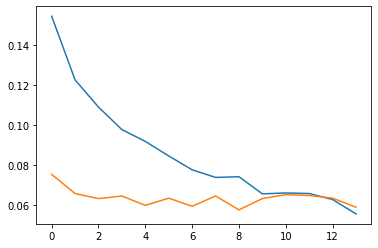

In [8]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [9]:
y_pred = model.predict_classes(x_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [10]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(y_pred,y_test)*100

98.19

In [11]:
# Evaluation of test data

import numpy as np

y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred,axis=1)
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [12]:
#save model
model.save("Digit_R_model.hdf5")